In [1]:
import numpy as np
import csv

import matplotlib.pyplot as plt

(-1099.6101722357978, 1099.610172235798, -1098.5118304606, 1099.929134783838)

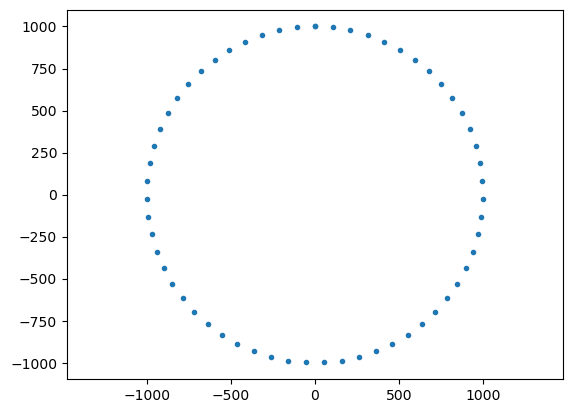

In [2]:
Y_rad = 1000

def generate_S1_S2(Y_rad, number_of_points = 60):
    angles = np.linspace(0, 2*np.pi, number_of_points)
    x = Y_rad*np.sin(angles)
    y = Y_rad*np.cos(angles)
    return x,y

testx, testy = generate_S1_S2(Y_rad)
plt.plot(testx, testy, '.')
plt.axis('equal')

In [4]:
radius_constant = 0.816496580927726
dataset_dictionary = [
    {
        'number': 0,
        'Y': 100,
        'H': 0
    },
    {
        'number': 1,
        'Y': 100,
        'H': 1000
    },
    {
        'number': 2,
        'Y': 666,
        'H': 9999
    },
]


Y_func = lambda eqps, d_dict: (d_dict['Y'] + eqps*d_dict['H'])*radius_constant

for ddd in dataset_dictionary:
    nnn = ddd['number']
    f = open(f'./{nnn}/PCYS.OUT', 'w')
    q = open(f'./{nnn}/STR_STR.OUT', 'w')

    for eqps in [ 0, 0.01, 0.03, 0.06, 0.12 ]:
        x, y = generate_S1_S2(Y_func(eqps, ddd))
        f.write('S1\tS2\tD1\tD2\n')
        for xx, yy in zip(x,y):
            f.write(f'{xx}\t{yy}\t0\t0\n')
        q.write('\tEvm\tSvm\tE11\tE22\tE33\tE23\tE13\tE12\tSDEV11\tSDEV22\tSDEV33\n')
        q.write(f'\t{eqps}\t0\t0\t0\t{eqps}\t0\t0\t0\t0\t0\t0\n')

    f.close()
    q.close()